### Wrangle data

Database holds the key symbols needed and data from Yahoo or Quandl. Key data held includes:
* Symbol
* Date
* Close
* Percentage Change

#### Hypothesis
Price of gold is driven by the change in the long term value of the currency or currency debasement. Currency debasement is primarily a political event driven by:
* Inflation, where higher means greater currency weakness
* Nominal interest rates, where higher means greater threat of inflation

A stable political environment will be characterised by
* No significant change in the real interest rate of return (10 year interest rate - consumer price index)
* No significant currency weakness over time

#### Key comparisons
Higher gold price compared to local currency:
* Zero or negative real rate of return
    * High Inflation (CPI)
    * High Nominal Interest Rate (10Yr)
* Stable or modest currency weakness:
    * Local currency compared to US Dollar Index
    * Local currency compared to Gold
* Direction - compared to 3, 6, 9, 12 and 24 months ago
* Sentiment indicator - ?
    
#### Key representations:
Line graphs for:
* Gold / US DOllar
* Gold / Local currency (GBP, EUR, JPY, YUAN)
* Real Rate of Return = 10Yr(%) - CPI(%)
* Local currency / US Dollar Index to demonstrate relative strength

In [1]:
from database import Database

GOLD = "WGC/GOLD_DAILY_USD"
SPDR_GLD_ETF = "GLD"
FED = "FRED/DFF"
BOE = "BOE/IUDBEDR"
ECB = "BUNDESBANK/BBK01_SU0202"
CPI_US = "RATEINF/CPI_USA"

SAVE_LOCATION = "c:\\temp\\"
DATE = "date"
PRICE = "price"

s1 = "select * from price where symbol='{}'"
s2 = "select * from provider"
s3 = "select distinct comparison from provider"

data = Database()

In [3]:
import pandas
%matplotlib inline

START_DATE = "2017-07"
START_DATE_CPI = "2016-07"
TEN_YEAR_US = "FRED/DGS10"
CPI_US = "RATEINF/CPI_USA"

bond = data.resample([TEN_YEAR_US], START_DATE)
bond.reset_index(inplace=True)
print(bond)
cpi = data.get_data([CPI_US], START_DATE_CPI)
annual_cpi = data.return_value(cpi)
annual_cpi = annual_cpi[annual_cpi[DATE] > START_DATE]
print(annual_cpi)

        date      symbol  price  percent_change  total_return
0 2017-07-31  FRED/DGS10   2.30             NaN           NaN
1 2017-08-31  FRED/DGS10   2.12             NaN     -7.826087
2 2017-09-30  FRED/DGS10   2.27             NaN     -1.304348
               symbol        date    price  percent_change  total_return
1254  RATEINF/CPI_USA  2017-07-31  244.786        1.719947      1.719947
1255  RATEINF/CPI_USA  2017-08-31  245.519        1.938974      2.024542


In [41]:
a = annual_cpi[[DATE,"percent_change"]]
b = bond[[DATE, PRICE]]
b[DATE] = pandas.Series([str(sd)[0:10] for sd in b[DATE]])
a.set_index(DATE, inplace=True)
b.set_index(DATE, inplace=True)
c = pandas.concat([a, b], axis=1)
# b.insert(1,"pct",a["percent_change"])
print(c)

            percent_change  price
2017-07-31        1.719947   2.30
2017-08-31        1.938974   2.12
2017-09-30             NaN   2.27


C:\rnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


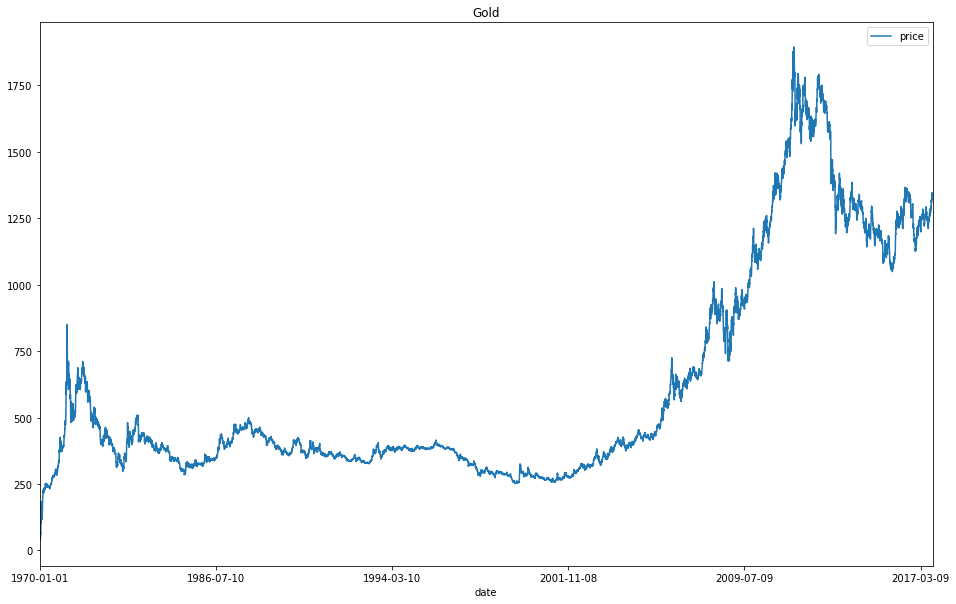

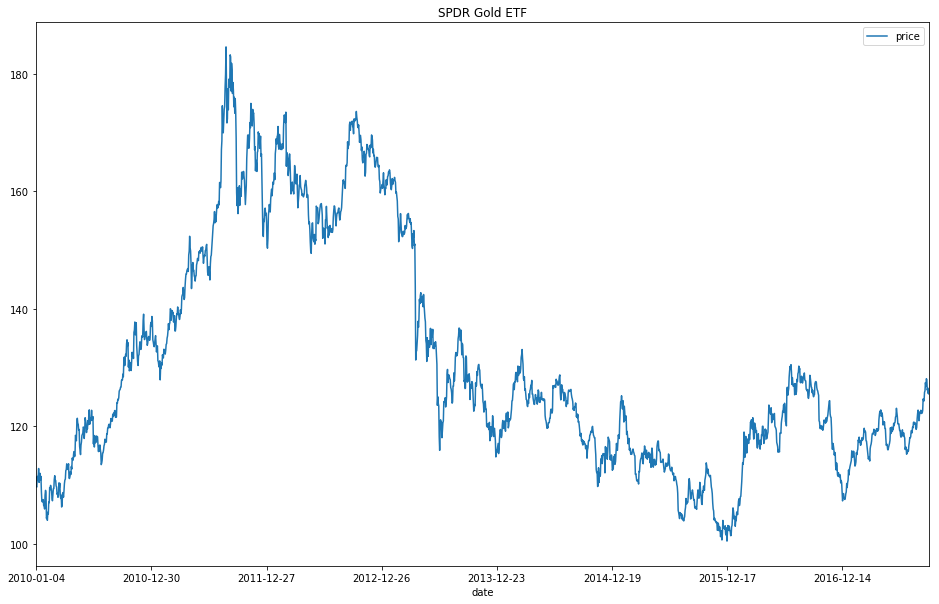

In [22]:
%matplotlib inline

gold = data._get(s1.format(GOLD))
gld = data._get(s1.format(GLD))


gold_chart = gold.plot(x=DATE,y=PRICE, title='Gold', figsize=(16,10)).get_figure()
gold_chart.savefig(SAVE_LOCATION + "gold_chart_20170907.png")

gld_chart = gld.plot(x=DATE,y=PRICE, title='SPDR Gold ETF', figsize=(16,10)).get_figure()
gld_chart.savefig(SAVE_LOCATION + "gld_chart_20170907.png")

In [23]:
rs = data._get(s3)
for i in rs.iterrows():
    print(i[1][0])
    

ShareIndex
Gold
WorldIndex
CommodityIndex
CentralBank
10Year
DollarIndex
Currency
Inflation
